In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./data/insurance.csv")

In [3]:
data['sex'] = data['sex'].astype('category').cat.codes
data['smoker'] = data['smoker'].astype('category').cat.codes
data['region'] = data['region'].astype('category').cat.codes

In [4]:
y = data['charges']
X = data.drop('charges', axis=1)

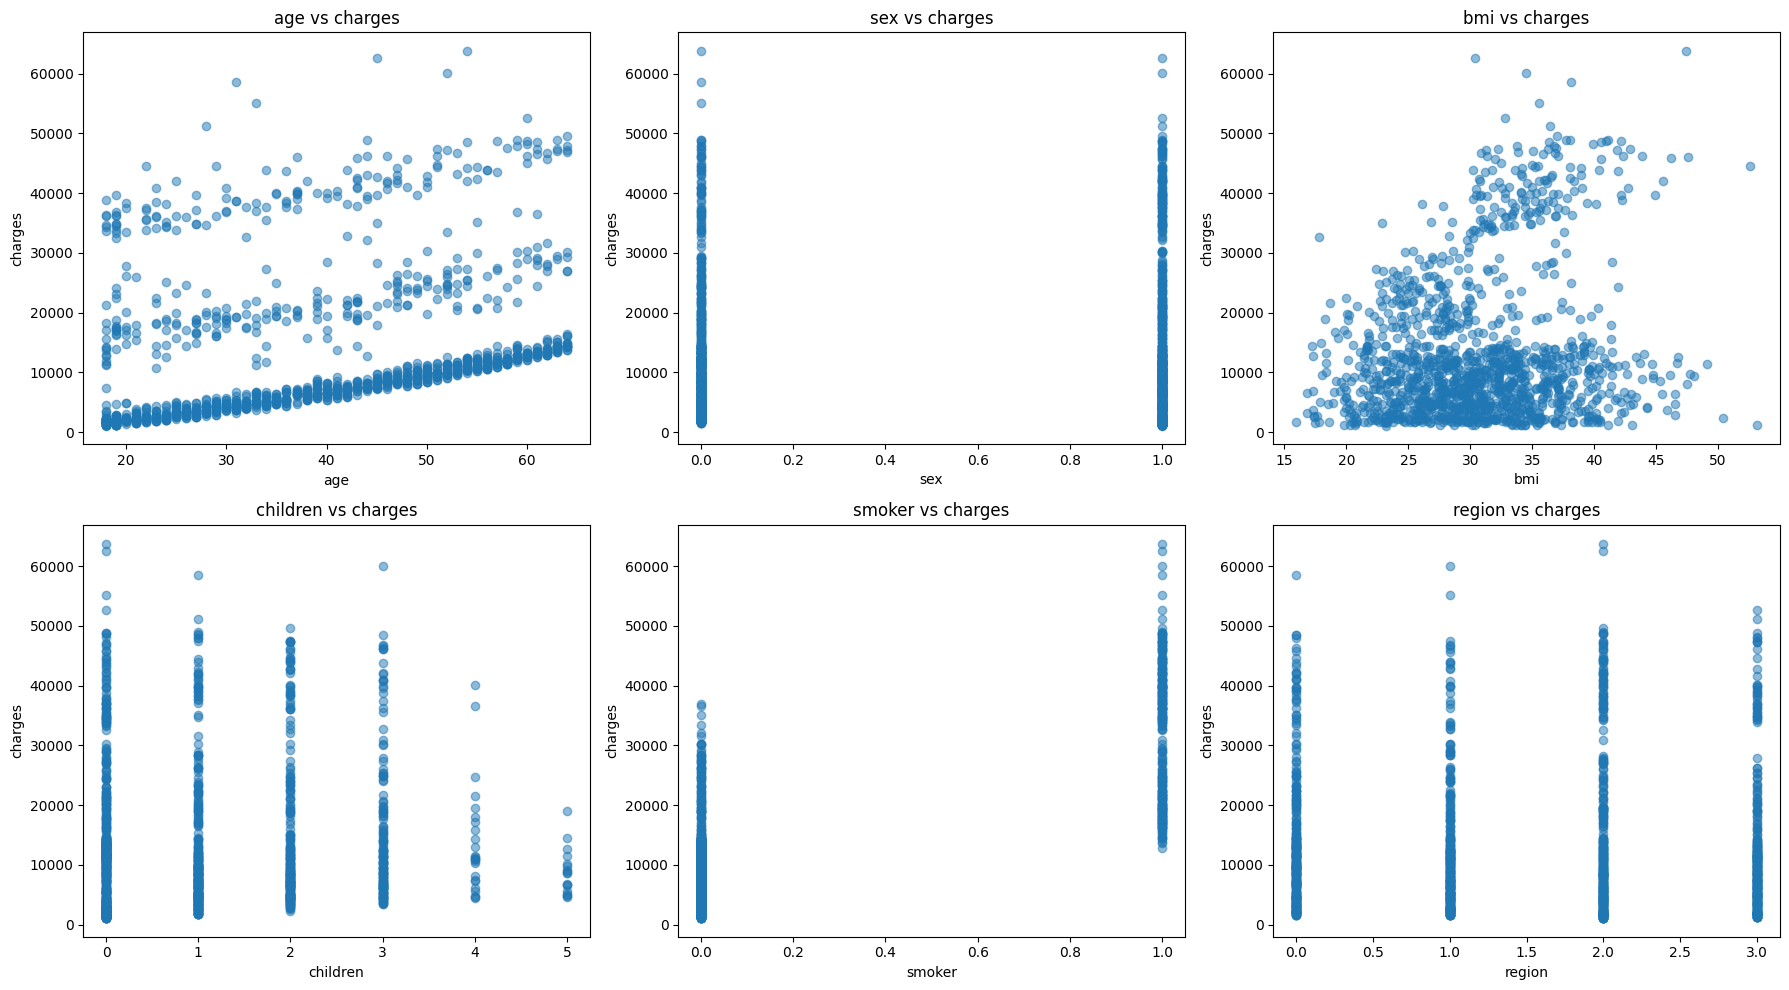

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.ravel()

for i, column in enumerate(X.columns):
    axs[i].scatter(data[column], y, alpha=0.5)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("charges")
    axs[i].set_title(f"{column} vs charges")

plt.tight_layout()
plt.show()

In [6]:
X = data.drop('charges', axis=1).values
y = data['charges'].values

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]

In [9]:
def compute_cost(X, y, w):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(w) - y)**2)

In [10]:
def gradient_descent(X, y, lr=0.000001, iterations=10):
    m, n = X.shape
    w = np.zeros(n)
    costs = []

    for i in range(iterations):
        predictions = X.dot(w)
        error = predictions - y
        gradients = (1/m) * X.T.dot(error)
        w -= lr * gradients
        costs.append(compute_cost(X, y, w))

    return w, costs

In [11]:
w_final, cost_history = gradient_descent(X_train_b, y_train)

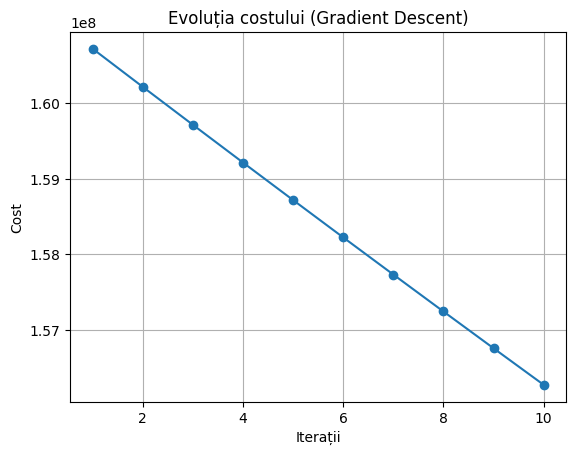

In [12]:
plt.plot(range(1, len(cost_history)+1), cost_history, marker='o')
plt.xlabel("Iterații")
plt.ylabel("Cost")
plt.title("Evoluția costului (Gradient Descent)")
plt.grid(True)
plt.show()

In [13]:
y_train_pred = X_train_b.dot(w_final)
y_val_pred = X_val_b.dot(w_final)

In [14]:
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

In [15]:
print(f"R² pe setul de antrenare: {r2_train:.4f}")
print(f"R² pe setul de validare: {r2_val:.4f}")
print("Learning rate folosit:", 0.000001)

R² pe setul de antrenare: -1.1655
R² pe setul de validare: -1.0203
Learning rate folosit: 1e-06


In [16]:
means = X_train.mean()
stds = X_train.std()

In [17]:
X_train_scaled = (X_train - means) / stds
X_val_scaled = (X_val - means) / stds

In [18]:
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val_b = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

In [19]:
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

In [20]:
print(f"R² (train, scaled): {r2_train:.4f}")
print(f"R² (val, scaled): {r2_val:.4f}")
print("Learning rate folosit:", 0.01)

R² (train, scaled): -1.1655
R² (val, scaled): -1.0203
Learning rate folosit: 0.01


In [22]:
feature_names = data.drop('charges', axis=1).columns.tolist()
abs_coeffs = np.abs(w_final[1:]) 

In [23]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs_coeffs
}).sort_values(by='Importance', ascending=True)

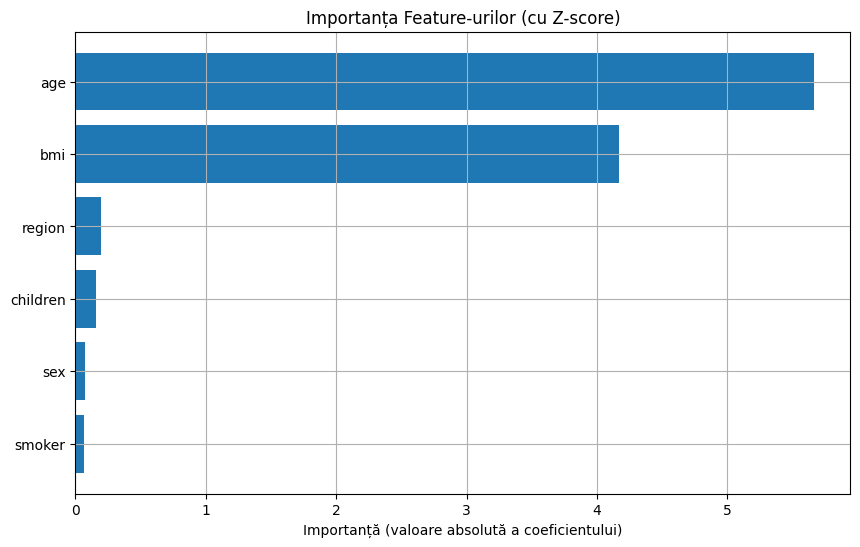

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importanță (valoare absolută a coeficientului)")
plt.title("Importanța Feature-urilor (cu Z-score)")
plt.grid(True)
plt.show()

In [25]:
importance_df[::-1]

,Feature,Importance
0,age,5.661026
2,bmi,4.172366
5,region,0.198874
3,children,0.156517
1,sex,0.070951
4,smoker,0.064997


In [26]:
data['age^2'] = data['age'] ** 2
data['bmi^2'] = data['bmi'] ** 2
data['children^2'] = data['children'] ** 2

In [27]:
X = data.drop('charges', axis=1)
y = data['charges'].values

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
means = X_train.mean()
stds = X_train.std()
X_train_scaled = (X_train - means) / stds
X_val_scaled = (X_val - means) / stds

In [30]:
X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val_scaled_b = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

In [31]:
w_final, cost_history = gradient_descent(X_train_scaled_b, y_train)

In [35]:
y_train_pred = X_train_scaled_b.dot(w_final)
y_val_pred = X_val_scaled_b.dot(w_final)
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

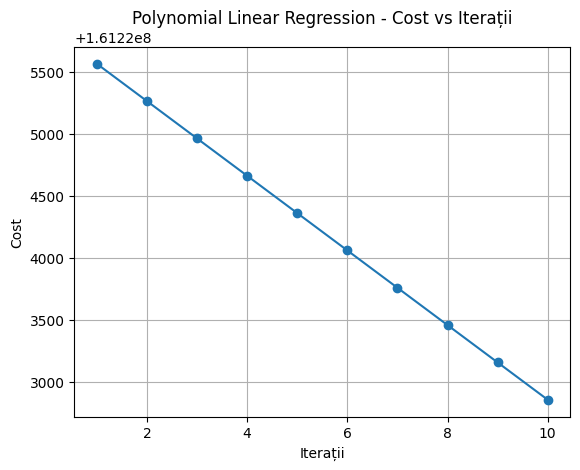

In [38]:
plt.plot(range(1, len(cost_history)+1), cost_history, marker='o')
plt.xlabel("Iterații")
plt.ylabel("Cost")
plt.title("Polynomial Linear Regression - Cost vs Iterații")
plt.grid(True)
plt.show()

In [39]:
print(f"R² pe train (polinomial): {r2_train:.4f}")
print(f"R² pe validation (polinomial): {r2_val:.4f}")

R² pe train (polinomial): -1.2340
R² pe validation (polinomial): -1.0832


In [40]:
feature_names = X.columns.tolist()

In [42]:
coefficients = w_final[1:]
abs_coefficients = np.abs(coefficients)

In [43]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs_coefficients
}).sort_values(by='Importance', ascending=True)

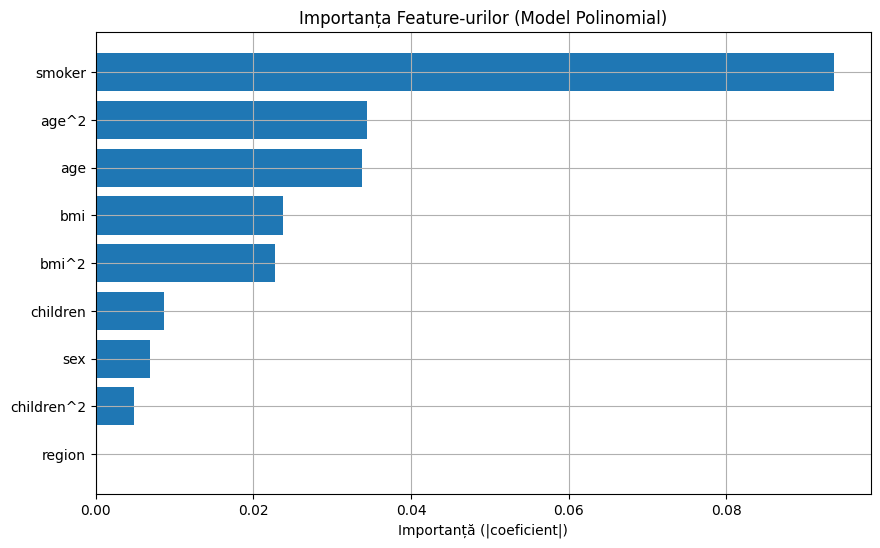

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importanță (|coeficient|)")
plt.title("Importanța Feature-urilor (Model Polinomial)")
plt.grid(True)
plt.show()

In [45]:
importance_df[::-1]

,Feature,Importance
4,smoker,0.093672
6,age^2,0.034374
0,age,0.033830
2,bmi,0.023694
7,bmi^2,0.022711
3,children,0.008632
1,sex,0.006821
8,children^2,0.004884
5,region,0.000014


In [46]:
data = pd.read_csv("./data/insurance.csv")
data['sex'] = data['sex'].astype('category').cat.codes
data['smoker'] = data['smoker'].astype('category').cat.codes
data['region'] = data['region'].astype('category').cat.codes

In [47]:
data['age^2'] = data['age']**2
data['bmi^2'] = data['bmi']**2

In [48]:
selected_features = ['smoker', 'bmi', 'age^2']
X = data[selected_features]
y = data['charges'].values

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
means = X_train.mean()
stds = X_train.std()
X_train_scaled = (X_train - means) / stds
X_val_scaled = (X_val - means) / stds

In [51]:
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val_b = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

In [52]:
w_bonus, cost_bonus = gradient_descent(X_train_b, y_train)

In [53]:
y_train_pred = X_train_b.dot(w_bonus)
y_val_pred = X_val_b.dot(w_bonus)
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

In [54]:
print(f"R² pe train (feature-uri selectate): {r2_train:.4f}")
print(f"R² pe val (feature-uri selectate): {r2_val:.4f}")

R² pe train (feature-uri selectate): -1.2340
R² pe val (feature-uri selectate): -1.0832


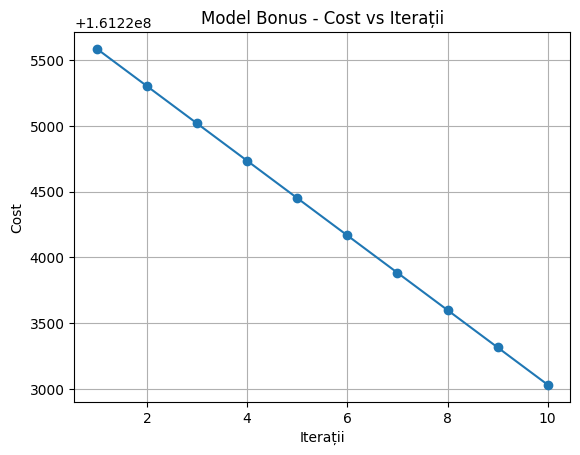

In [55]:
plt.plot(range(1, len(cost_bonus)+1), cost_bonus, marker='o')
plt.xlabel("Iterații")
plt.ylabel("Cost")
plt.title("Model Bonus - Cost vs Iterații")
plt.grid(True)
plt.show()